In [3]:
# All functions
from numpy import *
from pandas import *
import matplotlib.pyplot as plt

def changeData(data):                        # It's function to Clean Data

    sy= ['€', "m", "Th", "."]                                       
    for s in sy:                            # modifing column of Costs 
        if s == "m": 
            data['cost'] = data['cost'].str.replace(s, '0000')
        if s == "Th":
            data['cost'] = data['cost'].str.replace(s, '000')
        data['cost'] = data['cost'].str.replace(s, '')

    for i in range(len(data)):              # to remove NULLs from age column
        if ( data.loc[i,'age']!=float(data.loc[i,'age']) ):
            data=data.drop(index=i)

    data.reset_index(drop=True,inplace=True) #re indexing

    for i in range(len(data)):              # to remove NULLs from Cost column
        x= str(data.loc[i,'cost']).find('nan')
        if x ==0 :
            data=data.drop(index = i)

    data.reset_index(drop=True,inplace=True)
    for i in range(len(data)):              # to remove NULLs from Name column
        x= str(data.loc[i,'name']).find('nan')
        if x ==0 :
            data=data.drop(index = i)

    return data

def retired():   # to know ages of retired players
    li=[]
    for i in range(len(data)):
        if data.loc[i,'new_club'] =='Retired':
            li.append(data.loc[i,'age'])
    return li


def num_of_trans_out( f_country,s_country,index=0 ):  #function to know number of transfers between two countries
    cnt=0
    for i in range(len(data)):
        if data.loc[i,'country_origin_club']==f_country and data.loc[i,'country_new_club']==s_country:
            cnt+=1
            if index == 1:
                print(DataFrame(data.loc[i]))
    return(cnt)



def num_of_trans_in(country,index=0): #function to know number of transfers inside one country
    count=0
    for i in range(len(data)):
        if data.loc[i,'country_origin_club']==country and data.loc[i,'country_new_club']==country:
            count+=1
            if index == 1:
                print(data.loc[i])
    return(count)

def clubs(country):                   # function to show all clubs in every country
    c=set()
    for i in range(len(data)):
        if data.loc[i,'country_origin_club'] == country:
            c.add(data.loc[i,'origin_club'])
        if data.loc[i,'country_new_club'] == country:
            c.add(data.loc[i,'new_club'])
    return c

def details(country):               # function to show some details about every country
    x= data.groupby('country_origin_club').agg({'age':['max','mean'],'cost':['max','mean'], 'name':'size'})
    x['num_of_clubs']=len(clubs(country))
    return(x.loc[country])


In [30]:
data=read_csv('Summer22_FootballTransfers.csv') # reading data from PC
data=changeData(data)
data.fillna('noclub',inplace=True)
data.to_csv('version5.csv')
data=read_csv('version5.csv')

print(type(data.loc[5,'cost']))          # to know the type of cost
# print(data.isna().sum())               #to know num of NULLs in every column
print('list of all ages of retired players:\n',retired())
print('this is the mean age of retired players:{:.2f}'.format(mean(retired())))
print('this is the age of the oldest player:',data['age'].max()) 
print('-'*20)
print('this is all info about the oldest player-------------->')
print(data.loc[data['age']==data['age'].max()])
# print(data['cost'].max())

num_of_trans_out('Italy','France')
num_of_trans_in('Italy')
clubs('Syria')


C:\Users\islam\AppData\Local\Temp\ipykernel_14596\4261903657.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['cost'] = data['cost'].str.replace(s, '')


<class 'numpy.int64'>
list of all ages of retired players:
 [42.0, 33.0, 45.0, 37.0, 25.0, 35.0, 31.0, 37.0, 34.0, 29.0, 37.0, 26.0, 38.0, 35.0, 35.0, 29.0, 36.0, 40.0, 36.0, 39.0, 31.0, 37.0, 32.0, 37.0, 33.0, 30.0, 36.0, 33.0, 36.0, 37.0, 24.0, 24.0, 36.0, 39.0, 31.0, 38.0, 31.0, 37.0, 32.0, 29.0, 25.0, 30.0, 34.0, 38.0, 36.0, 30.0, 33.0, 20.0, 26.0, 21.0, 38.0, 35.0, 38.0, 38.0, 30.0, 31.0, 38.0, 35.0, 36.0, 36.0, 40.0, 37.0, 36.0, 35.0, 33.0, 27.0, 33.0, 17.0, 38.0, 37.0, 38.0, 38.0, 37.0, 38.0, 39.0, 38.0, 39.0, 39.0, 39.0, 42.0, 36.0, 38.0, 36.0, 38.0, 36.0, 36.0, 38.0, 40.0, 36.0, 40.0, 37.0, 38.0, 39.0, 34.0, 37.0, 36.0, 35.0, 36.0, 38.0, 46.0, 36.0, 38.0, 38.0, 34.0, 37.0, 35.0, 38.0, 35.0, 35.0, 40.0, 30.0, 34.0, 38.0, 37.0, 37.0, 34.0, 33.0, 34.0, 33.0, 38.0, 35.0, 36.0, 35.0, 38.0, 38.0, 36.0, 37.0, 39.0, 38.0, 36.0, 33.0, 37.0, 32.0, 37.0, 34.0, 36.0, 36.0, 37.0, 36.0, 33.0, 37.0, 36.0, 35.0, 35.0, 36.0, 36.0, 38.0, 34.0, 36.0, 33.0, 34.0, 36.0, 39.0, 34.0, 34.0, 37.0, 35.

Text(0.5, 1.0, 'players in every position which sum less than 2000')

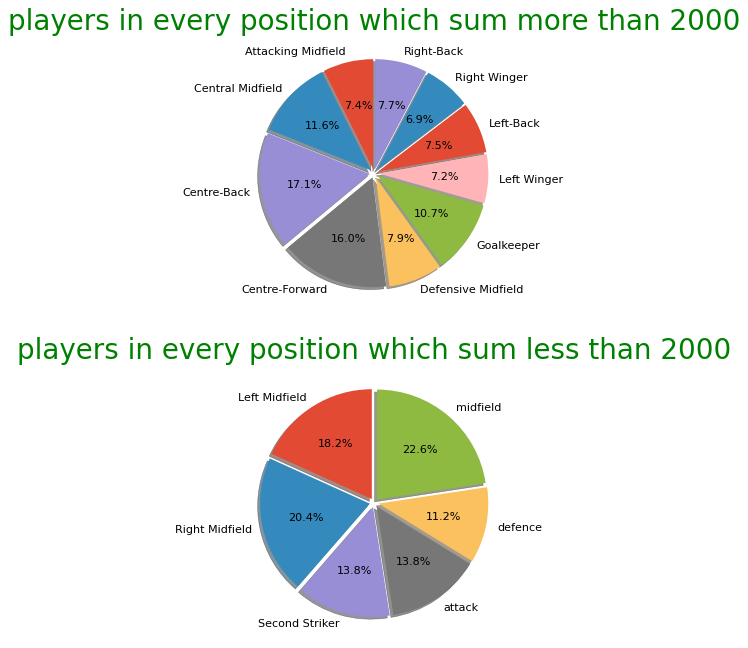

In [33]:
df=data.groupby('position').size() # show numbers of player in every position 
# print(df)
df1={}
df2={}
for i in range(len(df.values)):
    if df.values[i] >= 2000:
        df1[df.index[i]]=df.values[i]
    else:
        df2[df.index[i]]=df.values[i]



dl=df.values.sum()
prcnt=list()
for i in df.values:                # percentage of every position 
   prcnt.insert(i,"%.2f"%((i/dl)*100)) 
# print(prcnt)

for i in df.index:                 # dictionary of percentage
    per_pos={df.index[i]:prcnt[i]for i in range(len(prcnt))}
# print(per_pos)

# visualization of number of player in every position
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,10) , dpi = 80)
ax1 =plt.subplot2grid((2,1),(0,0))
plt.title('players in every position which sum more than 2000' , fontsize = 25 , color = 'g')
plt.pie(df1.values(),labels= df1.keys() , autopct= '%1.1f%%', startangle=90,explode= [0.04 for i in range(len(df1))] ,shadow = True)

ax1 =plt.subplot2grid((2,1),(1,0))
plt.pie(df2.values(),labels= df2.keys() ,autopct= '%1.1f%%', startangle=90,explode= [0.04 for i in range(len(df2))],shadow =True)
plt.title('players in every position which sum less than 2000' , fontsize = 25 ,color = 'g')
